# Generic Bitmap Generator

A generic bitmap generator. In this case, the bitmap is determines the 8-12 bit signal values in given sequence used to determine symbols of modulation.

In [23]:
import numpy as np

def cosineBitmap (amplitude, shift, resolution, frequency, offset, num_period):
    
    # Determine the number of horizontal divisions
    # Higher the resolution, the slower the output frequency
    num_samples = (2**resolution)
    
    # Create sample index for array, defined with desired number of periods
    samples = np.arange(num_period * num_samples)
    
    # Calculate Bitmap
    bitmap = amplitude * np.cos(frequency * (2*np.pi*samples)/(num_samples) + shift) + offset
    
    return bitmap

def sineBitmap (amplitude, shift, resolution, frequency, offset, num_period):
    
    # Determine the number of horizontal divisions
    # Higher the resolution, the slower the output frequency
    num_samples = (2**resolution)
    
    # Create sample index for array, defined with desired number of periods
    samples = np.arange(num_period * num_samples)
    
    # Calculate Bitmap
    bitmap = amplitude * np.sin(frequency * (2*np.pi*samples)/(num_samples) + shift) + offset
    
    return bitmap

def formatBitmap (bitmap):

    i = 1

    string = ''

    for value in bitmap:
        
        if value < 1000 and value > 100:
            
            string = string + ' ' + (str(int(value)) + ', ')
            
        elif value < 100 and value > 10:
            
            string = string + '  ' + (str(int(value)) + ', ')
            
        elif value < 10:
            
            string = string + '   ' + (str(int(value)) + ', ')
            
        else:
            string = string + (str(int(value)) + ', ')
        
        if i % 8 == 0:
            
            string = string + ('\n')
            
        i = i + 1
            
    print(string)

bitmap = sineBitmap (511, 0, 5,1, 511, 1) 

bitmap2 = sineBitmap (511, 0, 5,2, 511, 1) 
    

In [24]:
formatBitmap(bitmap)

 511,  610,  706,  794,  872,  935,  983, 1012, 
1022, 1012,  983,  935,  872,  794,  706,  610, 
 511,  411,  315,  227,  149,   86,   38,    9, 
   0,    9,   38,   86,  149,  227,  315,  411, 



In [25]:
formatBitmap(bitmap2)

 511,  706,  872,  983, 1022,  983,  872,  706, 
 511,  315,  149,   38,    0,   38,  149,  315, 
 510,  706,  872,  983, 1022,  983,  872,  706, 
 511,  315,  149,   38,    0,   38,  149,  315, 



C:\Users\navni\AppData\Local\Temp\ipykernel_34072\3971517909.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(bitmap2, 'ro', color='blue')


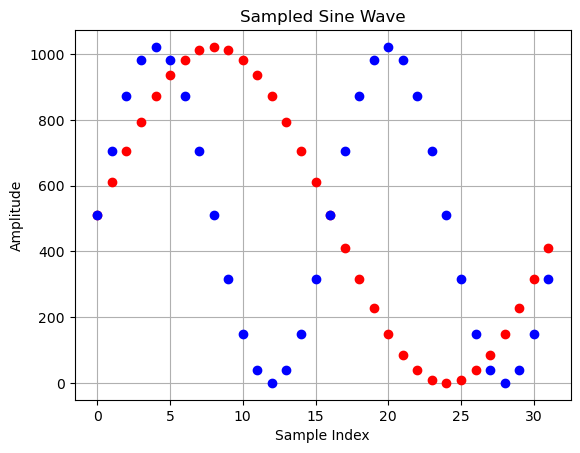

In [26]:
import matplotlib.pyplot as plt

plt.plot(bitmap, 'ro')
plt.plot(bitmap2, 'ro', color='blue')
plt.title('Sampled Sine Wave')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

# Frequency Specific Bitmap  Generator

This bitmap generator can used to produce frequency specific symbols for modulation based on fasted update rate of the Teensy 4.1 running a 20 MHz SPI bus for MCP4811 10 bit DAC. The time between sample updates was measured to be 1.305 microseconds.

In [27]:
def cosineBitmap (amplitude, shift, num_samples, offset, num_period):

    # Create sample index for array, defined with desired number of periods
    samples = np.arange(num_period * num_samples)
    
    # Calculate Bitmap
    bitmap = amplitude * np.cos((2*np.pi*samples)/(num_samples) + shift) + offset
    
    return bitmap

def sineBitmap (amplitude, shift, num_samples, offset, num_period):
    
    # Create sample index for array, defined with desired number of periods
    samples = np.arange(num_period * num_samples)
    
    # Calculate Bitmap
    bitmap = amplitude * np.sin((2*np.pi*samples)/(num_samples) + shift) + offset
    
    return bitmap

def getNumSamples (frequency):
    
    num_samples = int((1/frequency) / (1.305 * 10**(-6)))
    print(f'{num_samples + 1} samples will generate a {1/((num_samples+1)*(1.305 * 10**(-6)))} waveform\n')
    print(f'{num_samples} samples will generate a {1/((num_samples)*(1.305 * 10**(-6)))} waveform\n')
    print(f'{num_samples-1} samples will generate a {1/((num_samples-1)*(1.305 * 10**(-6)))} waveform\n')


In [28]:
getNumSamples(100000)

8 samples will generate a 95785.44061302683 waveform

7 samples will generate a 109469.0749863164 waveform

6 samples will generate a 127713.92081736913 waveform



In [29]:
getNumSamples(75000)

11 samples will generate a 69662.13862765588 waveform

10 samples will generate a 76628.35249042146 waveform

9 samples will generate a 85142.61387824608 waveform



In [30]:
bitmap = sineBitmap (amplitude=511, shift=0, num_samples=8, offset=511, num_period=1)
bitmap2 = sineBitmap (amplitude=300, shift=0, num_samples=10, offset=300, num_period=1)

In [31]:
formatBitmap(bitmap)

 511,  872, 1022,  872,  511,  149,    0,  149, 



In [32]:
formatBitmap(bitmap2)

 300,  476,  585,  585,  476,  300,  123,   14, 
  14,  123, 


C:\Users\navni\AppData\Local\Temp\ipykernel_34072\3971517909.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(bitmap2, 'ro', color='blue')


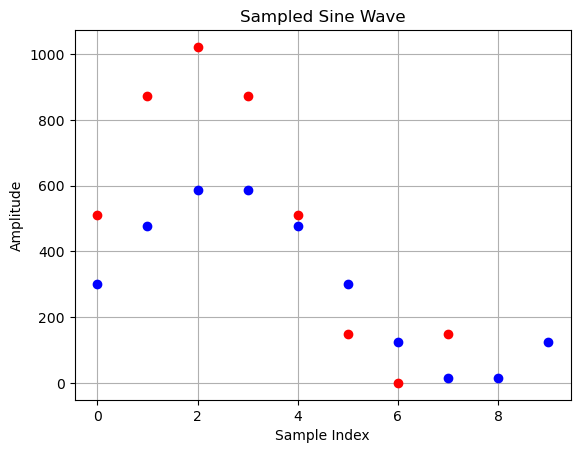

In [33]:
import matplotlib.pyplot as plt

plt.plot(bitmap, 'ro')
plt.plot(bitmap2, 'ro', color='blue')
plt.title('Sampled Sine Wave')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()